**DS 301: Applied Data Modeling and Predictive Analysis**

# Lab 3 – Classifier

Justin Park, 21 September 2022

## 1. Get and visualize the data to gain insights

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
data_path = os.path.join("datasets", "german_credit_data.csv")
data = pd.read_csv(data_path)

In [3]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
import matplotlib.pyplot as plt


## 2. Separate the data into features (x) and label (y) such that

- y is a binary target, indicating whether risk is "good"
- x contains the following numerical columns: Age, Job, Credit amount, Duration.

In [5]:
attributes = ['Age',
             'Job',
             'Credit amount',
             'Duration']

x = data[attributes]

y = (data['Risk'] == 'good')

## 3. Pick 2 of the following classifiers and train them, using only numeric features.

- Gaussian Naive Bayes
- Decision Tree
- KNN
- LogisticRegression

In [6]:
# Guassian Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(x,y)

# Implement another classifier of your choice
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(x, y)


DecisionTreeClassifier()

## 4. Report the following performance measures on both classifiers. [2 points]

- training accuracy
- cross-validation accuracy
- confusion matrix
- precision
- recall
- F1
- AUC

In [7]:
# Training accuracy

from sklearn import metrics
#Naive Bayes
print(metrics.accuracy_score(y, clf_gnb.predict(x)))

# Your second classifier
print(metrics.accuracy_score(y, clf_tree.predict(x)))


0.71
1.0


In [8]:
# cross-validation accuracy

from sklearn.model_selection import cross_val_score
#Naive Bayes
print(cross_val_score(clf_gnb, x,y, cv = 3, scoring = "accuracy"))

# Your second classifier
#Decision Tree
print(cross_val_score(clf_tree, x,y, cv = 3, scoring = "accuracy"))


[0.70958084 0.6996997  0.6996997 ]
[0.61676647 0.61861862 0.61561562]


In [9]:
from sklearn.model_selection import cross_val_predict

clf_gnb_pred = cross_val_predict(clf_gnb, x, y ,cv = 3)

#Decision Tree
clf_tree_pred = cross_val_predict(clf_tree, x, y ,cv = 3)


In [10]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
#Naive Bayes
print(confusion_matrix(y, clf_gnb_pred))

#Decision Tree
print(confusion_matrix(y, clf_tree_pred))


[[ 74 226]
 [ 71 629]]
[[118 182]
 [201 499]]


#### Precision Score = TP/(TP + FP)

#### Recall Score  = TP/(TP + FN)

#### F1 Score = Harmonic Mean of Precision and Recall



In [11]:
# Precision, recall and F1

from sklearn.metrics import precision_score, recall_score, f1_score

#Naive Bayes
print("Precision Score:", precision_score(y, clf_gnb_pred))
print("Recall Score: ", recall_score(y, clf_gnb_pred))
print("F1 Score:", f1_score(y, clf_gnb_pred))

#Decision Tree
print("Precision Score:", precision_score(y, clf_tree_pred))
print("Recall Score: ", recall_score(y, clf_tree_pred))
print("F1 Score:", f1_score(y, clf_tree_pred))


Precision Score: 0.735672514619883
Recall Score:  0.8985714285714286
F1 Score: 0.8090032154340836
Precision Score: 0.7327459618208517
Recall Score:  0.7128571428571429
F1 Score: 0.7226647356987691


In [12]:
#Naive Bayes
y_gnb_score = cross_val_predict(clf_gnb, x, y ,cv = 3, method = "predict_proba")

#Decision Tree
y_tree_score = cross_val_predict(clf_tree, x, y ,cv = 3, method = "predict_proba")


In [13]:
from sklearn.metrics import roc_auc_score
#Naive Bayes
print(roc_auc_score(y, y_gnb_score[:,1]))

#Decision Tree
print(roc_auc_score(y, y_tree_score[:,1]))

0.6200809523809524
0.5573809523809523


#### Describe which classifier you would pick and why?

Although the decision tree had a higher training accuracy, there are many performance metrics to look at. Overall, the Naive Bayes classifier performed better when looking at most of the performance metrics after the training accuracy.

In [14]:
data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


C:\Users\justi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<AxesSubplot:xlabel='Age', ylabel='Risk'>

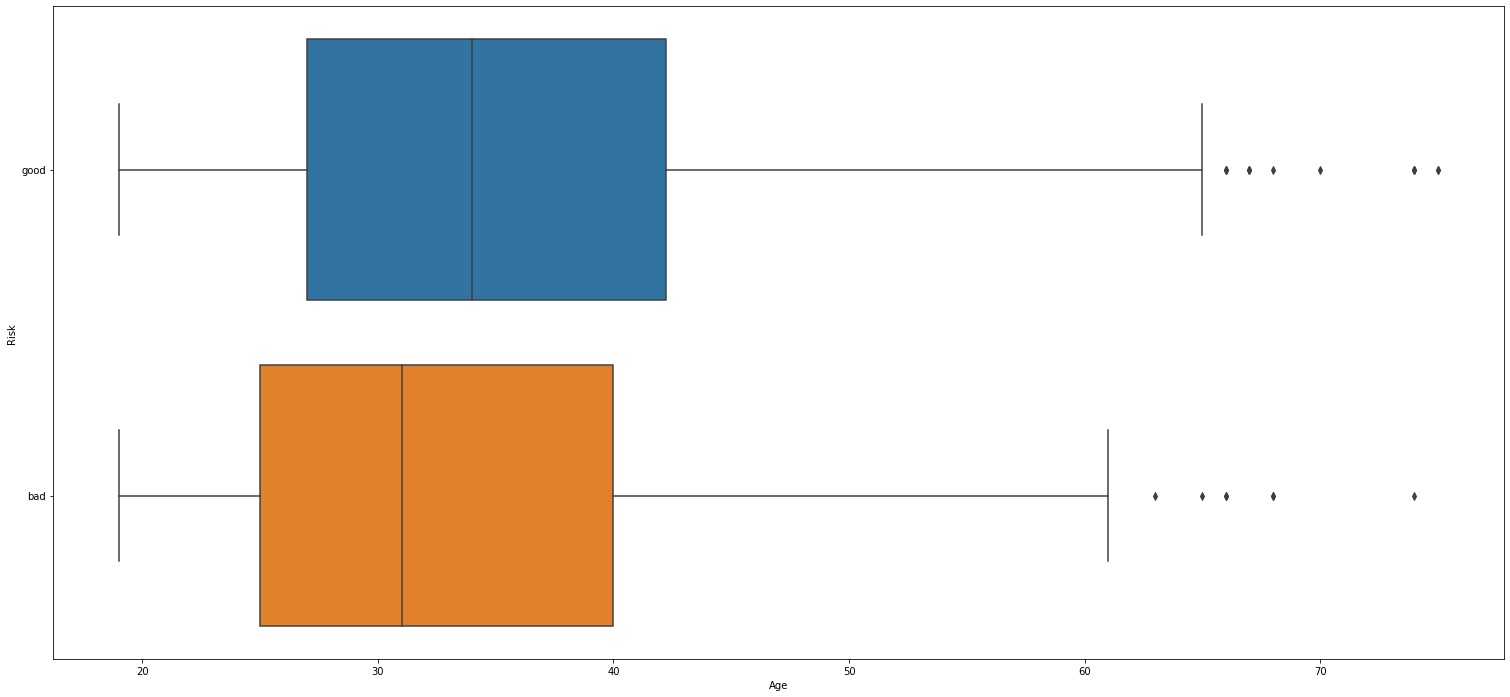

In [15]:
#Visualize the data
import seaborn as sns

#Age has the highest correlation to the Risk out of the 4 features.
#Older people tend to have better risk.
plt.figure(figsize=(26, 12))
sns.boxplot(x="Age", y="Risk", data=data)

In [16]:
#Construct features and label dataframes
attributes = ['Age',
             'Sex',
             'Job',
             'Housing',
             'Saving accounts',
             'Checking account',
             'Credit amount',
             'Duration',
             'Purpose']

features = data[attributes]

label = (data['Risk'] == 'good')

In [17]:
#Apply one hot encoding to each of the features.
#The categorial features are Sex, Job, Housing, Saving accounts, Checking account, and Purpose
#Sex
#There is a pretty even distribution between male and female for risk.
data = pd.read_csv(data_path)
sex_1hot = pd.get_dummies(data['Sex'], prefix='Sex')
data = pd.concat([data, sex_1hot], axis=1)
data.head(20)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Sex_female,Sex_male
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,0,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1,0
2,2,49,male,1,own,little,NaN,2096,12,education,good,0,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,0,1
4,4,53,male,2,free,little,little,4870,24,car,bad,0,1
5,5,35,male,1,free,NaN,NaN,9055,36,education,good,0,1
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good,0,1
7,7,35,male,3,rent,little,moderate,6948,36,car,good,0,1
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good,0,1
9,9,28,male,3,own,little,moderate,5234,30,car,bad,0,1


In [18]:
#Job
#No correlation between job and risk
data = pd.read_csv(data_path)
job_1hot = pd.get_dummies(data['Job'], prefix='Job')
data = pd.concat([data, job_1hot], axis=1)
data.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Job_0,Job_1,Job_2,Job_3
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,0,0,1,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,0,0,1,0
2,2,49,male,1,own,little,NaN,2096,12,education,good,0,1,0,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,0,0,1,0
4,4,53,male,2,free,little,little,4870,24,car,bad,0,0,1,0
5,5,35,male,1,free,NaN,NaN,9055,36,education,good,0,1,0,0
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good,0,0,1,0
7,7,35,male,3,rent,little,moderate,6948,36,car,good,0,0,0,1
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good,0,1,0,0
9,9,28,male,3,own,little,moderate,5234,30,car,bad,0,0,0,1


In [19]:
#Housing
#In general, people who own their house have better credit risk.
#Rent and free housing are pretty even with a slight edge to good credit.
data = pd.read_csv(data_path)
housing_1hot = pd.get_dummies(data['Housing'], prefix='Housing')
data = pd.concat([data, housing_1hot], axis=1)
data.head(20)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Housing_free,Housing_own,Housing_rent
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,0,1,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,0,1,0
2,2,49,male,1,own,little,NaN,2096,12,education,good,0,1,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,1,0,0
4,4,53,male,2,free,little,little,4870,24,car,bad,1,0,0
5,5,35,male,1,free,NaN,NaN,9055,36,education,good,1,0,0
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good,0,1,0
7,7,35,male,3,rent,little,moderate,6948,36,car,good,0,0,1
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good,0,1,0
9,9,28,male,3,own,little,moderate,5234,30,car,bad,0,1,0


In [20]:
#Saving accounts
#I see a correlation between savings account and risk
#where everyone with little savings has bad risk but there
#are also people with little savings with good risk.
#For the most part, people who are rich or quite rich have good risk.
data = pd.read_csv(data_path)
saving_1hot = pd.get_dummies(data['Saving accounts'], prefix='Saving accounts')
data = pd.concat([data, saving_1hot], axis=1)
data.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,0,0,0,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1,0,0,0
2,2,49,male,1,own,little,NaN,2096,12,education,good,1,0,0,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,1,0,0,0
4,4,53,male,2,free,little,little,4870,24,car,bad,1,0,0,0
5,5,35,male,1,free,NaN,NaN,9055,36,education,good,0,0,0,0
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good,0,0,1,0
7,7,35,male,3,rent,little,moderate,6948,36,car,good,1,0,0,0
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good,0,0,0,1
9,9,28,male,3,own,little,moderate,5234,30,car,bad,1,0,0,0


In [21]:
#Checking accounts
#I do not see much of a correlation between checking account and risk.
data = pd.read_csv(data_path)
checking_1hot = pd.get_dummies(data['Checking account'], prefix='Checking account')
data = pd.concat([data, checking_1hot], axis=1)
data.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Checking account_little,Checking account_moderate,Checking account_rich
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,1,0,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,0,1,0
2,2,49,male,1,own,little,NaN,2096,12,education,good,0,0,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,1,0,0
4,4,53,male,2,free,little,little,4870,24,car,bad,1,0,0
5,5,35,male,1,free,NaN,NaN,9055,36,education,good,0,0,0
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good,0,0,0
7,7,35,male,3,rent,little,moderate,6948,36,car,good,0,1,0
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good,0,0,0
9,9,28,male,3,own,little,moderate,5234,30,car,bad,0,1,0


In [22]:
#Purpose
#Purpose has an interesting correlation since risk is bad for liabilities such as cars but good for investments like education, radio/tv, furniture/equipment.
data = pd.read_csv(data_path)
purpose_1hot = pd.get_dummies(data['Purpose'], prefix='Purpose')
data = pd.concat([data, purpose_1hot], axis=1)
data.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,0,0,0,0,0,1,0,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,0,0,0,0,0,1,0,0
2,2,49,male,1,own,little,NaN,2096,12,education,good,0,0,0,1,0,0,0,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,0,0,0,0,1,0,0,0
4,4,53,male,2,free,little,little,4870,24,car,bad,0,1,0,0,0,0,0,0
5,5,35,male,1,free,NaN,NaN,9055,36,education,good,0,0,0,1,0,0,0,0
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good,0,0,0,0,1,0,0,0
7,7,35,male,3,rent,little,moderate,6948,36,car,good,0,1,0,0,0,0,0,0
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good,0,0,0,0,0,1,0,0
9,9,28,male,3,own,little,moderate,5234,30,car,bad,0,1,0,0,0,0,0,0


In [23]:
#These attributes have the highest correlation from what I saw in the data.
#The attributes with the lowest correlation coefficients have been removed.
data = pd.read_csv(data_path)
attributes = ['Age',
             'Housing',
             'Saving accounts',
             'Purpose']

features = data[attributes]

label = (data['Risk'] == 'good')

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(attributes, label))

ValueError: could not convert string to float: 'Age'

In [ ]:
clf_gnb2 = GaussianNB()
clf_gnb2.fit(features, label)

In [ ]:
clf_tree2 = tree.DecisionTreeClassifier()
clf_tree2.fit(features, label)